In [0]:
!pip install -q keras
import keras

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, Add, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils 

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()


(60000, 28, 28)


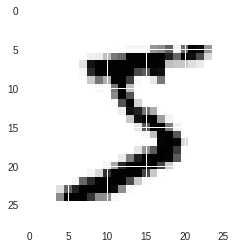

In [0]:
print (x_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])


In [0]:

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

inputs = Input(shape=(28, 28, 1))
X = Conv2D(32, (3, 3), padding = 'same', activation='relu')(inputs)
X = Conv2D(64, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)
X = Dropout(0.25)(X)
X = Flatten()(X)
X = Dense(196, activation='relu')(X)
recon = MaxPooling2D((2, 2))(inputs)
recon = Reshape((196,), input_shape=(28, 28))(recon)
X = Add()([recon, X])
X = Dropout(0.5)(X)
output = Dense(num_classes, activation='softmax')(X)
model = Model(inputs=[inputs], outputs=[output])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 26, 26, 64)   18496       conv2d_3[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 13, 13, 64)   0           conv2d_4[0][0]                   
__________________________________________________________________________________________________
dropout_3 

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, 
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])


In [0]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs = epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.2777 - acc: 0.9140 - val_loss: 0.0552 - val_acc: 0.9817
Epoch 2/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.0885 - acc: 0.9725 - val_loss: 0.0385 - val_acc: 0.9874
Epoch 3/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.0657 - acc: 0.9795 - val_loss: 0.0313 - val_acc: 0.9890
Epoch 4/12
60000/60000 [==============================] - 11s 175us/step - loss: 0.0550 - acc: 0.9835 - val_loss: 0.0301 - val_acc: 0.9895
Epoch 5/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.0472 - acc: 0.9861 - val_loss: 0.0284 - val_acc: 0.9910
Epoch 6/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.0420 - acc: 0.9869 - val_loss: 0.0236 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.0374 - acc: 0.9890 - val_loss: 0.

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)

In [0]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.023476195494099465
Test accuracy: 0.9927


In [0]:
y_pred = model.predict(x_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.05481784e-14 3.01082428e-13 1.99200456e-09 1.94534411e-09
  2.10045303e-15 6.18437093e-15 3.57552393e-17 1.00000000e+00
  7.61161642e-13 2.21114627e-10]
 [8.14518869e-11 4.07940515e-10 1.00000000e+00 1.07457760e-12
  3.37304335e-17 1.45506827e-16 2.28549367e-11 1.23017178e-14
  6.14829097e-14 1.51234503e-16]
 [8.74662842e-10 9.99998927e-01 3.00419174e-08 5.73636472e-10
  6.60188391e-07 9.12576823e-08 5.60301778e-08 2.23715816e-07
  5.27452215e-08 4.51949173e-10]
 [9.99998569e-01 8.49885370e-11 3.86289791e-08 7.89758883e-11
  9.61984659e-12 4.40715908e-09 1.40477664e-06 1.40885250e-08
  4.56198146e-09 2.71318026e-08]
 [6.41121357e-12 1.19939850e-10 1.22334393e-10 1.01523126e-13
  9.99990106e-01 6.73985433e-12 8.76859089e-12 2.93935327e-11
  1.47533108e-09 9.94647053e-06]
 [4.04486195e-10 9.99999166e-01 2.66369371e-09 3.51134746e-11
  4.91164712e-07 4.05971878e-09 4.41703296e-09 3.58805806e-07
  1.10578373e-08 3.01276254e-10]
 [2.65125617e-12 8.19379142e-09 1.78620241e-09 1.52833440e

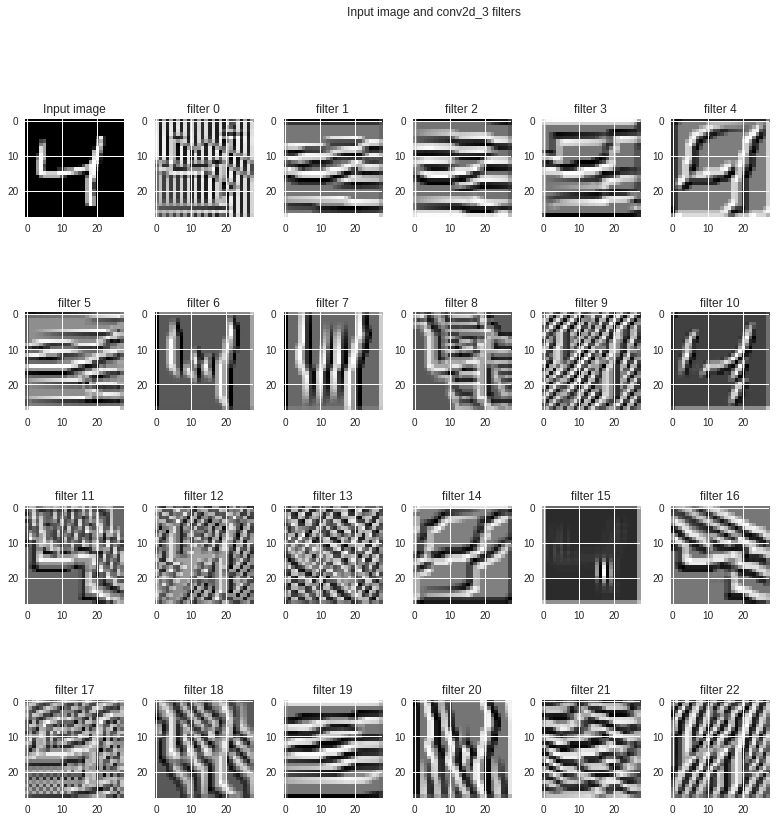

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(x_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()


